In [61]:
import numpy as np
import pandas as pd
data = pd.read_csv('airnow_fall.csv')
AQI = data.iloc[:, 10].values # used to be 7


# indexes = [2, 3, 5]
# for index in sorted(indexes, reverse=True):
#     del my_list[index]
print(type(AQI))
print(len(AQI))

AQI = AQI.tolist()


<class 'numpy.ndarray'>
2064


In [62]:
import numpy as np

def average_adiag(x):
    """Average antidiagonal elements of a 2d array
    Parameters:
    -----------
    x : np.array
        2d numpy array of size

    Return:
    -------
    x1d : np.array
        1d numpy array representing averaged antediangonal elements of x

    """
    x1d = [np.mean(x[::-1, :].diagonal(i)) for i in
           range(-x.shape[0] + 1, x.shape[1])]
    return np.array(x1d)
    
# x = np.arange(12).reshape(4,3)
# print(x)
load_np_6 = np.load('BiLSTM_pred_np_6_fall.npy')
new_np_6 = average_adiag(load_np_6)

new_np_6 = new_np_6.tolist()

load_np_6_full = np.load('BiLSTM_average_pred_48_6.npy')
new_np_6_full = average_adiag(load_np_6_full)

new_np_6_full = new_np_6_full.tolist()[4512:6576]

print(len(new_np_6_full))
print(len(new_np_6))

2064
2064


In [63]:
idx_l = []
for i in range(len(AQI)):
    if AQI[i] < 0:
        idx_l.append(i)
    if new_np_6[i] < 0:
        idx_l.append(i)
        
for index in sorted(idx_l, reverse=True):
    del AQI[index]
    
print(len(AQI))
AQI = np.array(AQI)

for index in sorted(idx_l, reverse=True):
    del new_np_6[index]
    
new_np_6 = np.array(new_np_6)

for index in sorted(idx_l, reverse=True):
    del new_np_6_full[index]
    
new_np_6_full = np.array(new_np_6_full)


1967


In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

for i in range(len(AQI)):
    if AQI[i] < 0:
        np.delete(AQI, i)
        np.delete(new_np_6, i)
        
print("Bi-LSTM - 6 hour")
print("MAE: " , (mean_absolute_error(AQI, new_np_6)))
print("RMSE: " , (sqrt(mean_squared_error(AQI, new_np_6))))
print("R2: " , (r2_score(AQI, new_np_6)))

Bi-LSTM - 6 hour
MAE:  22.980336401270172
RMSE:  33.735612490853924
R2:  0.7825002582857075


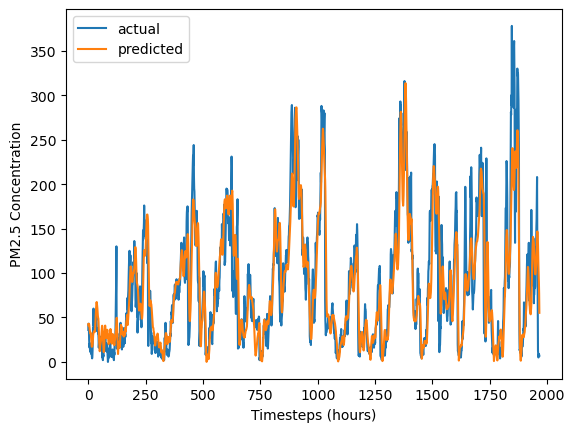

In [65]:
import matplotlib.pyplot as plt

plt.plot(AQI, label='actual')
plt.plot(new_np_6, label='predicted')
plt.xlabel("Timesteps (hours)")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.show()


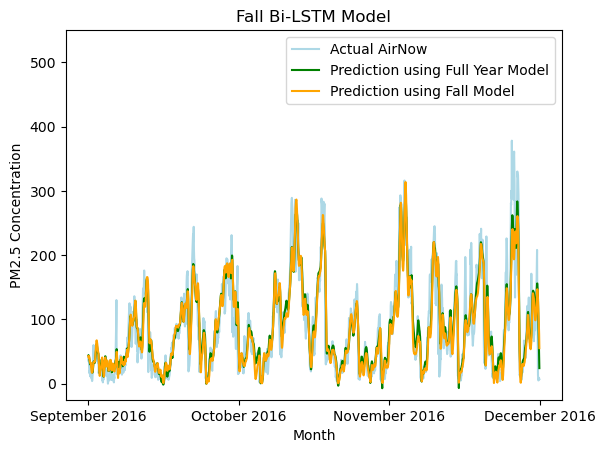

In [66]:
import matplotlib.pyplot as plt

ax = plt.axes()
plt.plot(AQI, label='Actual AirNow', color='lightblue')
plt.plot(new_np_6_full, label='Prediction using Full Year Model', color='green')
plt.plot(new_np_6, label='Prediction using Fall Model', color='orange')
ax.set_ylim(-25, 550)
ax.set_xticks([0, 656, 1312, 1968])
ax.set_xticklabels(['September 2016', 'October 2016', 'November 2016', 'December 2016'])
plt.title("Fall Bi-LSTM Model")
plt.xlabel("Month")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.show()
